In [4]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import bamboolib
import numpy as np



Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


In [2]:
#read in acs all cleaned dataset with engineered features and lagged target variable
acs_ca_metro = pd.read_csv("./data/cali_top5_reduced.csv",index_col=0)
tax_ca_metro = pd.read_csv("./data/metro_CA_tax.csv", index_col=0)

In [3]:
print(acs_ca_metro.shape)
print(tax_ca_metro.shape)

(6110, 126)
(4524, 6)


In [4]:
# Combine CA metro acs with tax data. After merging 4524 zipcodes are in both datasets
ca_metro_all = pd.merge(tax_ca_metro, acs_ca_metro, on = ["year","zipcode"], how = "inner")# 
ca_metro_all.shape

# for the purpose of this exercise use only 1 yr rent and drop NAs due to lagging
ca_metro_1y = pd.concat([ca_metro_all.iloc[:,0:7], ca_metro_all.iloc[:, 11:]], axis = 1) \
                .dropna(axis = 0)

In [5]:
ca_metro_1y.head()
ca_metro_1y.shape


(4517, 126)

In [7]:
# list(ca_metro_1y.columns)


In [6]:

# list(X.columns)

In [8]:
ca_metro_1y.shape

(4517, 126)

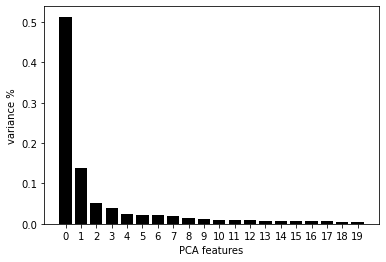

In [56]:
# (1) fit a pca with data. 
# (2) The cluster with PCs controlling for 'year' using Kmeans
year = 2015
X = ca_metro_1y.drop(["zipcode",'rent_in_1y', 'median_rent', 'avg_rent'], axis = 1)
X = X[X['year'] == year].drop(['year'], axis = 1)

#import libraies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data to have a mean of 0 and a variance of 1
X_std = StandardScaler().fit_transform(X)

# Create a PCA instance: pca
pca = PCA(n_components = 20)
pc = pca.fit_transform(X_std)

# plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCs = pd.DataFrame(pc)

In [58]:
print(PCs.shape)
print(X.shape)
print(X1.shape)


(751, 20)
(751, 121)
(751, 141)


In [59]:
X1 = pd.concat([X, PCs.reindex(X.index)], axis = 1)
corr0 = pd.DataFrame(X1.corr().iloc[:,121:125].reset_index())
old_names = corr0.columns.to_list()

nums = list(range(5))
nums = [str(x) for x in nums]
new_names = ["pc" + x for x in nums]

col_dict = dict(zip(old_names, new_names))
col_dict['index'] = 'var'
corr0 = corr0.rename(columns = col_dict)

corr0.columns = [str(column) for column in corr0.columns]

In [60]:
pc1_sorted = corr0.reindex(corr0.pc1.abs().sort_values(ascending = False).index)[['var','pc1']]
pc1_sorted

,var,pc1
0,N_returns_real_estate_taxes,NaN
1,Real_estate_taxes_amount,NaN
2,N_returns_mortgage_interest_paid,NaN
3,Mortgage_interest_paid_amount,NaN
4,not_us_citizen_pop,NaN
5,median_age,NaN
6,amerindian_pop,NaN
7,asian_male_45_54,NaN
8,asian_male_55_64,NaN
9,asian_pop,NaN


In [168]:
pc2_sorted = corr0.reindex(corr0.pc2.abs().sort_values(ascending = False).index)[['var','pc2']]
pc2_sorted[pc1_sorted["pc1"]>=.19]

,var,pc2
100,pop_never_married,8.210478e-02
35,male_20_to_29,6.573571e-02
30,female_20_to_29,5.640423e-02
44,commute_30_to_59,-1.636576e-02
121,0,-3.679655e-17


Text(0, 0.5, 'PC 2')

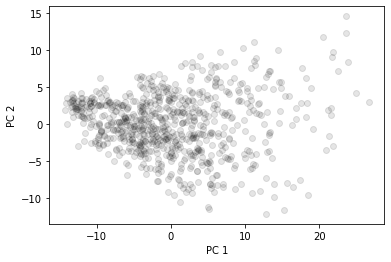

In [61]:
plt.scatter(PCs[0], PCs[1], alpha = .1, 
          color = 'black')
plt.xlabel("PC 1")
plt.ylabel("PC 2")

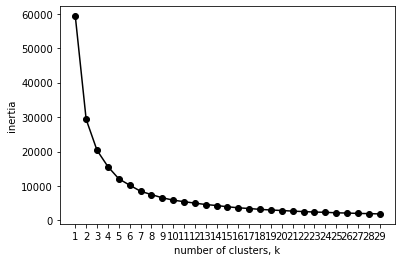

In [62]:
# find clusters using PCs
ks = range(1,30)
inertias = []
for k in ks: 
    #create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    #fit model to samples
    model.fit(PCs.iloc[:, :2])
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o',color = 'black')
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

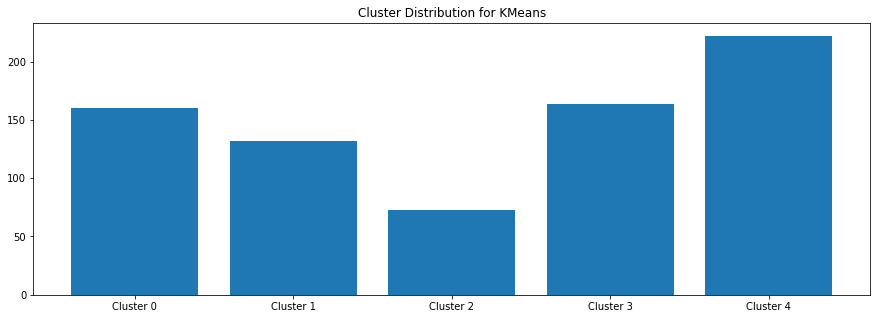

In [169]:
#choose k=2, get labels
n_clusters = 5
model = KMeans(n_clusters)
labels = model.fit_predict((PCs.iloc[:, :4]))

cluster_c = [len(labels[labels == i]) for i in range(n_clusters)] 
cluster_n = ["Cluster "+str(i) for i in range(n_clusters)]
plt.figure(figsize = (15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c)
plt.show()

[array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([14.7385063 ,  4.25905818, -0.32876124, -0.70161542]),
 array([14.7385063 ,  4.25905818, -0.32876124, -0.70161542]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([14.7385063 ,  4.25905818, -0.32876124, -0.70161542]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([14.7385063 ,  4.25905818, -0.32876124, -0.70161542]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([-9.72715194,  1.37313073, -0.23220002, -0.30914608]),
 array([-9.72715194,  1.37313073, -0.23220002, -0.30914608]),
 array([-9.72715194,  1.37313073, -0.23220002, -0.30914608]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([1.97113976, 3.45986675, 0.34308812, 0.67297825]),
 array([14.7385063 ,  4.25905818, -0.3287612